# This Jupyter Notebook Involves: 
## * Regression for Revenue
## * Classification for Success
## * A Recommenders System 

We have a dataset of about 45000 movies with metadata collected from TMDB. Using this data, we will try and answer various questions that I've always had about movies.


In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
#from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
import emoji
warnings.filterwarnings('ignore')
plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_csv('movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [3]:
df.columns

Index([u'adult', u'belongs_to_collection', u'budget', u'genres', u'homepage',
       u'id', u'imdb_id', u'original_language', u'original_title', u'overview',
       u'popularity', u'poster_path', u'production_companies',
       u'production_countries', u'release_date', u'revenue', u'runtime',
       u'spoken_languages', u'status', u'tagline', u'title', u'video',
       u'vote_average', u'vote_count'],
      dtype='object')

### Features
* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

## Data Wrangling

Let us start by removing the features that are not useful to us.

In [6]:
df = df.drop(['imdb_id'], axis=1)

In [7]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [8]:
df = df.drop('original_title', axis=1)

In [9]:
df[df['revenue'] == 0].shape

(38052, 22)

38052 movies out of 45460 movies do not show any revenue. This means we don't know their revenue. We will still keep them.

In [10]:
print(emoji.emojize(':smiley:', use_aliases=True))

😃


In [11]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [13]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 23)

In [14]:
df['release_date'].value_counts().head()

2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
Name: release_date, dtype: int64

In [15]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] \
                                                                       if x != np.nan else np.nan)

In [16]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

There are close to 0 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

In [17]:
df = df.drop('adult', axis=1)

In [18]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

## Exploratory Data Analysis

### Title and Overview Wordclouds

In [19]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [20]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

In [21]:
# title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
# plt.figure(figsize=(16,8))
# plt.imshow(title_wordcloud)
# plt.axis('off')
# plt.show()

In [22]:
# overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
# plt.figure(figsize=(16,8))
# plt.imshow(overview_wordcloud)
# plt.axis('off')
# plt.show()

### Production Countries

In [23]:
df['production_countries'].value_counts().head()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]    17851
[]                                                             6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]               2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                       1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                        1356
Name: production_countries, dtype: int64

In [24]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] \
                                                              if isinstance(x, list) else [])

In [25]:
df['production_countries'][0:5]

0    [United States of America]
1    [United States of America]
2    [United States of America]
3    [United States of America]
4    [United States of America]
Name: production_countries, dtype: object

In [26]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [27]:
s.head()

0    United States of America
1    United States of America
2    United States of America
3    United States of America
4    United States of America
Name: countries, dtype: object

In [28]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [29]:
con_df_NUSA = con_df[con_df['country'] != 'United States of America']

In [30]:
data = [ dict(
        type = 'choropleth',
        locations = con_df_NUSA['country'],
        locationmode = 'country names',
        z = con_df_NUSA['num_movies'],
        text = con_df_NUSA['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

In [31]:
layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)


In [32]:
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### Franchaise Movies

In [33]:
df['belongs_to_collection'].value_counts().head()

{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 29
{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.jpg', 'backdrop_path': '/jaUuprubvAxXLAY5hUfrNjxccUh.jpg'}                 27
{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}               26
{'id': 96887, 'name': 'Zatôichi: The Blind Swordsman', 'poster_path': '/8Q31DAtmFJjhFTwQGXghBUCgWK2.jpg', 'backdrop_path': '/bY8gLImMR5Pr9PaG3ZpobfaAQ8N.jpg'}    26
{'id': 37261, 'name': 'The Carry On Collection', 'poster_path': '/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg', 'backdrop_path': '/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg'}          25
Name: belongs_to_collection, dtype: int64

In [34]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [35]:
df_fran['belongs_to_collection'].head()

0               Toy Story Collection
2          Grumpy Old Men Collection
4     Father of the Bride Collection
9              James Bond Collection
12                  Balto Collection
Name: belongs_to_collection, dtype: object

In [36]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()
fran_pivot.head()

,belongs_to_collection,count,mean,sum
0,... Has Fallen Collection,2,183390043.5,366780087.0
1,00 Schneider Filmreihe,0,NaN,0.0
2,08/15 Collection,0,NaN,0.0
3,100 Girls Collection,0,NaN,0.0
4,101 Dalmatians (Animated) Collection,1,215880014.0,215880014.0


### Highest Grossing Movie Franchises

In [37]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


### Most Successful Movie Franchises (by Average Gross)

In [38]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


### Longest Running Franchises

In [39]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


### Production Companies

In [40]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] \
                                                              if isinstance(x, list) else [])

In [41]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [42]:
com_df = df.drop('production_companies', axis=1).join(s)

In [43]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

In [44]:
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [45]:
com_pivot.head()

,Total,Average,Number
"""DIA"" Productions GmbH & Co. KG",44350926.0,44350926.0,1
# Andrea Sperling Productions,0.0,NaN,0
# Lexyn Productions,0.0,NaN,0
'A' Production Committee,0.0,NaN,0
(주)로드픽쳐스,0.0,NaN,0


### Highest Earning Production Companies


In [46]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


### Most Succesful Production Companies

In [47]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


### Original Language

In [48]:
df['original_language'].drop_duplicates().shape[0]

93

In [49]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


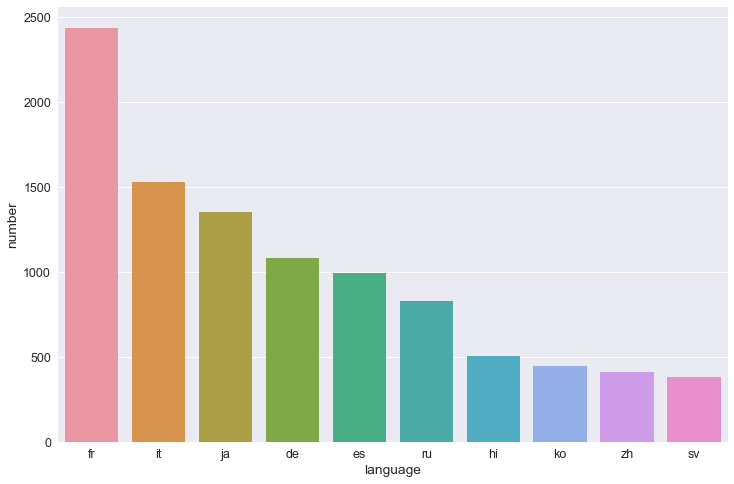

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

### Popularity, Vote Average and Vote Count

In [51]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [52]:
df['popularity'].value_counts().head()

0.0         34
0.0         32
1e-06       30
0.000844    26
1e-06       26
Name: popularity, dtype: int64

In [53]:
df['vote_count'].value_counts().head()

1.0    3264
2.0    3132
0.0    2899
3.0    2787
4.0    2480
Name: vote_count, dtype: int64

In [54]:
df['vote_average'].value_counts().head()

0.0    2998
6.0    2468
5.0    2001
7.0    1886
6.5    1722
Name: vote_average, dtype: int64

In [55]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [56]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [57]:
df['popularity'].value_counts().head()

0.000000    66
0.000001    56
0.000308    43
0.000220    40
0.002001    28
Name: popularity, dtype: int64

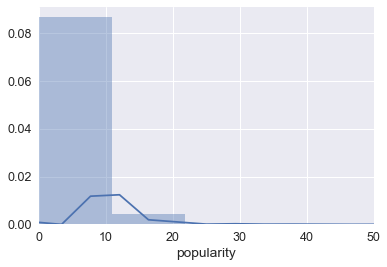

In [58]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.xlim(0,50)
plt.show()

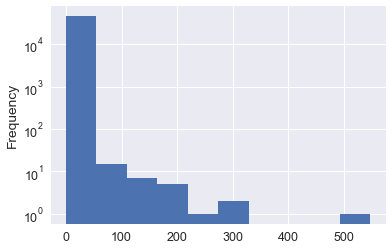

In [59]:
df['popularity'].plot(logy=True, kind='hist');

### Most Popular Movies by Popularity Score

In [60]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [61]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

### Most Voted on Movies

In [62]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [63]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

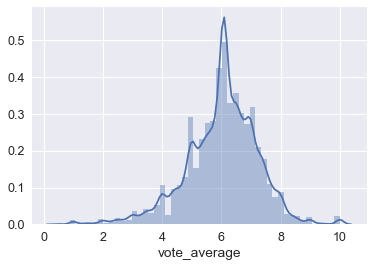

In [64]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()));

### Most Critically Acclaimed Movies

In [65]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', \
                                                                                         ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


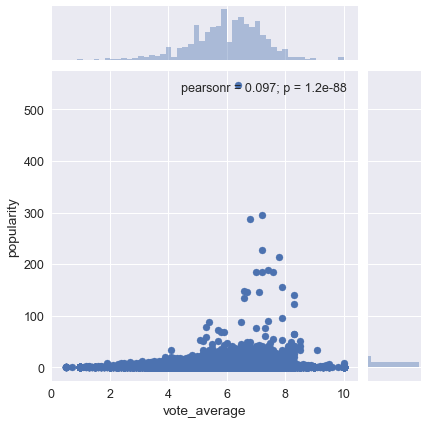

In [66]:
sns.jointplot(x='vote_average', y='popularity', data=df);

Surprisingly, the Pearson Coefficient of the two aforementioned quantities is a measly 0.097 which suggests that there is no tangible correlation.

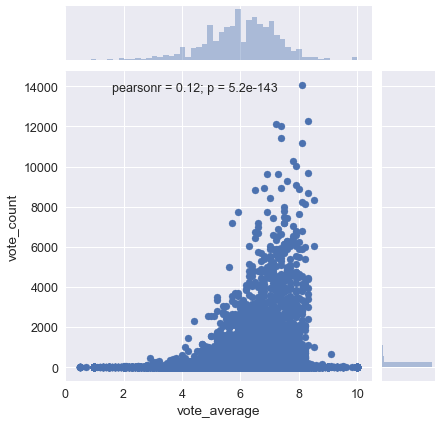

In [67]:
sns.jointplot(x='vote_average', y='vote_count', data=df);

There is a very small correlation between Vote Count and Vote Average. 

### Movie Release Dates

In [68]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [69]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [70]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [71]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

In [72]:
df['release_date'].dtype

dtype('O')

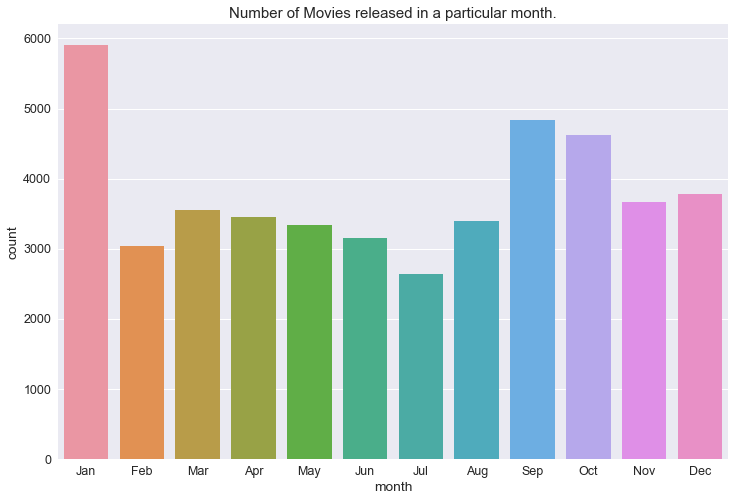

In [73]:
plt.figure(figsize=(12,8))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order);

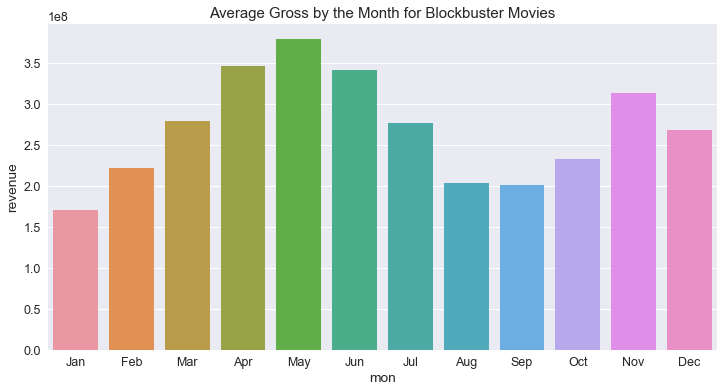

In [74]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon']=month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order);

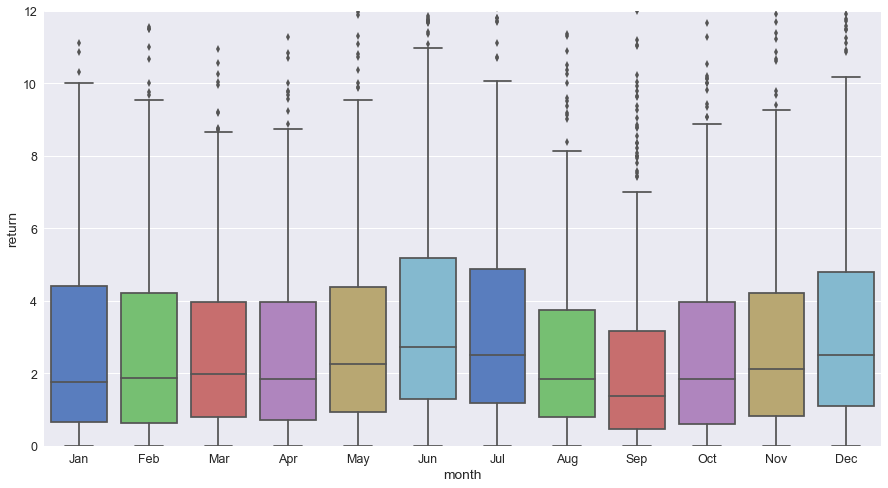

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12]);

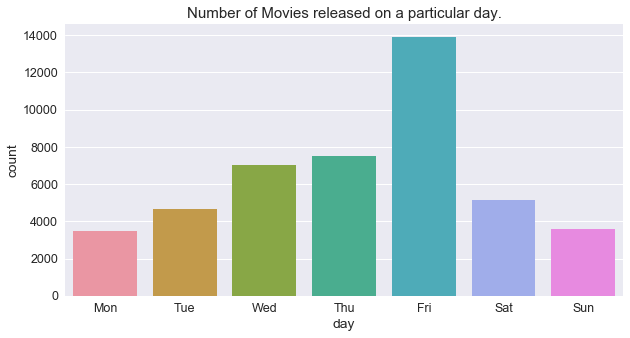

In [76]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order);

### Number of Movies by the year

In [77]:
year_count = df.groupby('year')['title'].count()
year_count.head()

year
1874    1
1878    1
1883    1
1887    1
1888    2
Name: title, dtype: int64

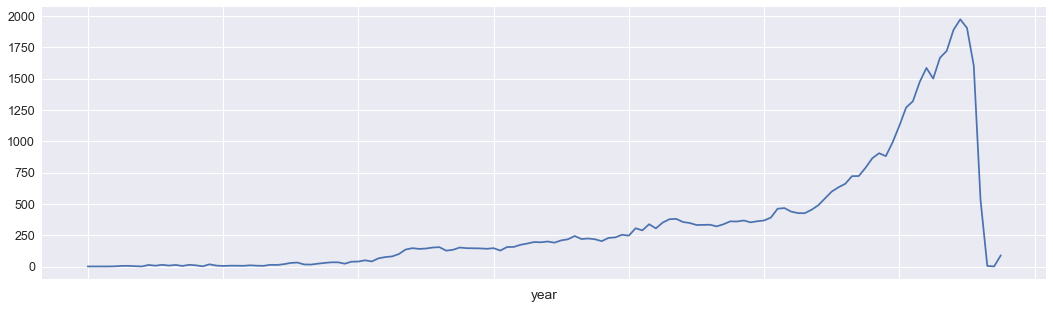

In [78]:
plt.figure(figsize=(18,5))
year_count.plot()

### Earliest Movies Represented

In [79]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


In [80]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, \
          'Nov': 11, 'Dec': 12}

In [81]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >= 2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

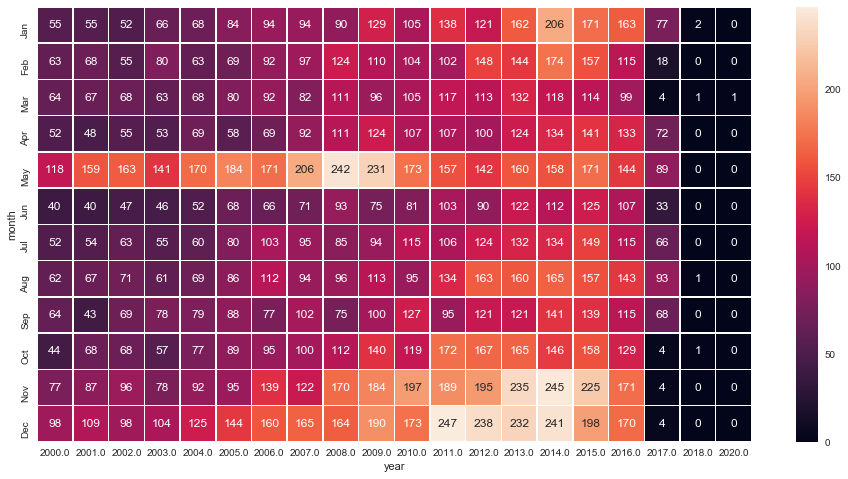

In [82]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order);

In [83]:
sns.set(font_scale=1.25)

### Movie Status

In [84]:
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

Almost every movie is indeed released. However, it is interesting to see that MovieLens has user ratings for movies that are still in the planning, production and post production stage. We might take this information into account while building our collaborative filtering recommendation engine.

### Spoken Languages

In [85]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).\
apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [86]:
df['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

In [87]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values\
('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


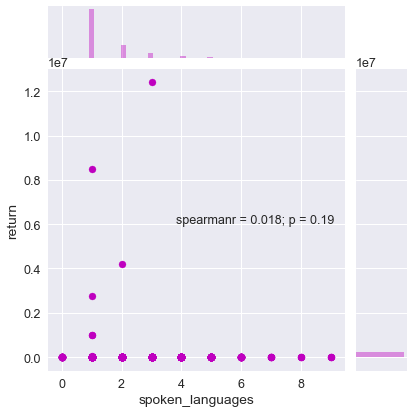

In [88]:
sns.jointplot(x="spoken_languages", y="return", data=df, stat_func=stats.spearmanr, color="m");

The Spearman Coefficient is 0.018 indicating no correlation between the two quantities.

### Runtime

In [89]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [90]:
df['runtime'] = df['runtime'].astype('float')

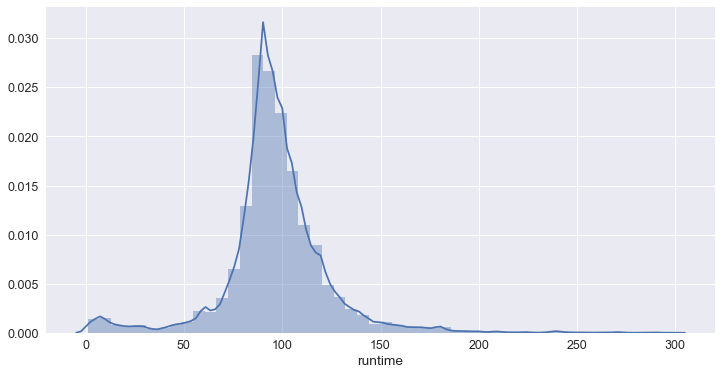

In [91]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime']<300) & (df['runtime']>0)]['runtime']);

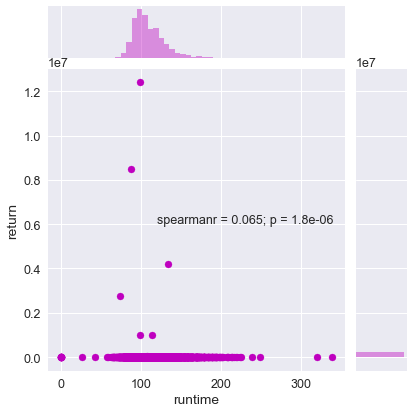

In [92]:
sns.jointplot(x="runtime", y="return", data=df, stat_func=stats.spearmanr, color="m");

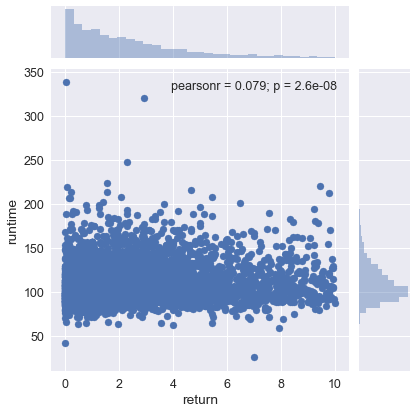

In [93]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

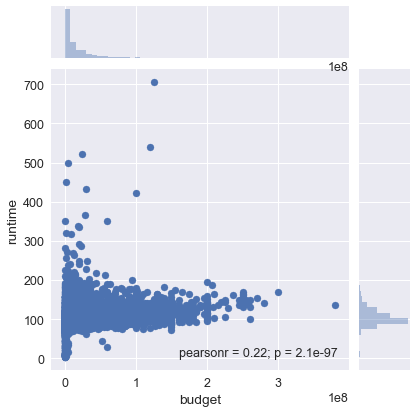

In [94]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

The two quantities have a much weaker correlation than expected. This distrubution is not as correlated. 

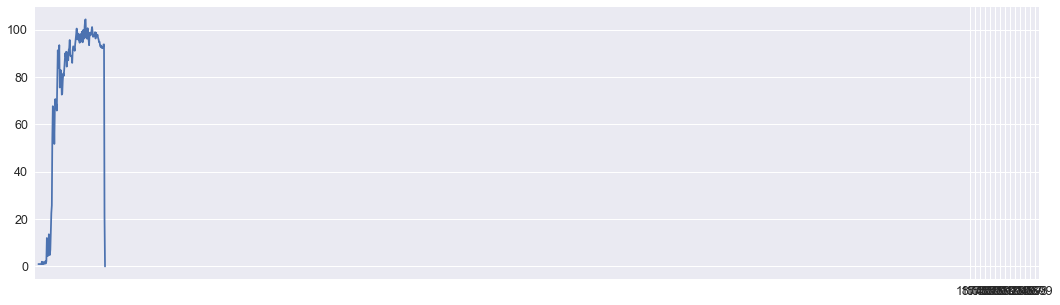

In [95]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

### Shortest Movies

In [96]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


### Longest Movies

In [97]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


### Budget

In [98]:
df['budget'].describe() # the mean is affected from the outliers since the median is orders of magnitude away.

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

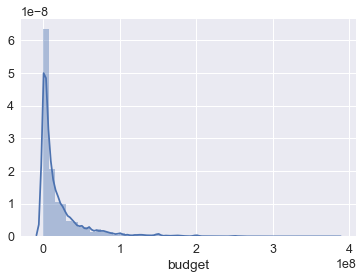

In [99]:
sns.distplot(df[df['budget'].notnull()]['budget']);

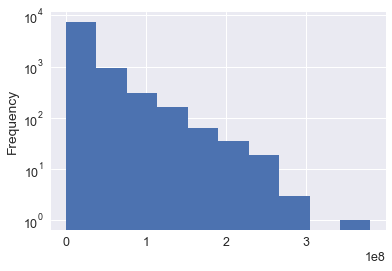

In [100]:
df['budget'].plot(logy=True, kind='hist');

### Most Expensive Movies of all Time

In [101]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', \
                                                                                         ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


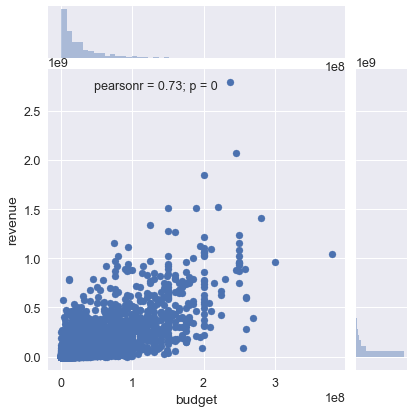

In [102]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()]);

The pearson r value of 0.73 between the two quantities indicates a very strong correlation.

### Revenue

In [103]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

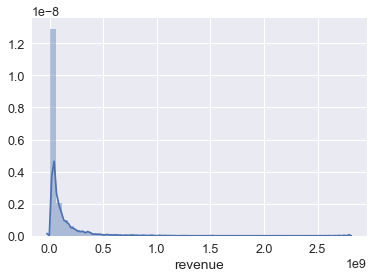

In [104]:
sns.distplot(df[df['revenue'].notnull()]['revenue']);

The distribution of revenue undergoes exponential decay just like budget. We also found that the two quantities were strongly correlated. Let us now take a look at the highest and least grossing movies of all time.

In [105]:
gross_top = df[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [106]:
pd.set_option('display.max_colwidth', 50)

#### To get an understanding of the revenue garnered by movies, let us plot the maximum revenue through the years.

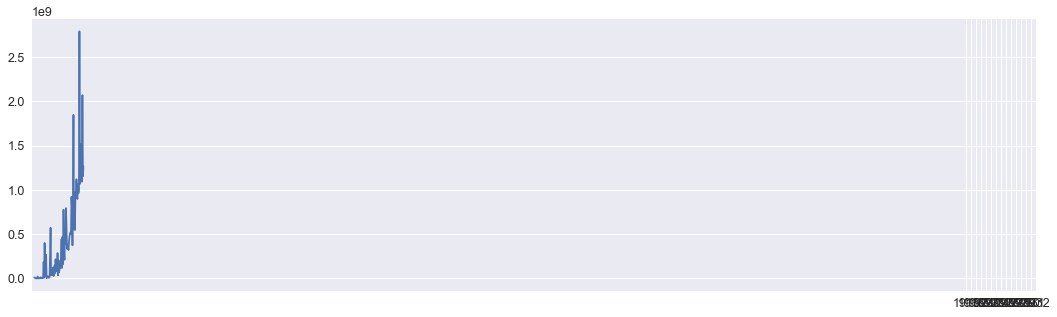

In [107]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show();

### Returns 

#### Most Successful Movies

In [108]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', \
                                                     'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


#### Worst Box Office Disasters

In [109]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)]\
[['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


## Ready for the Correlation Matrix

In [110]:
df['year'] = df['year'].replace('NaT', np.nan)

In [111]:
df['year'] = df['year'].apply(clean_numeric)

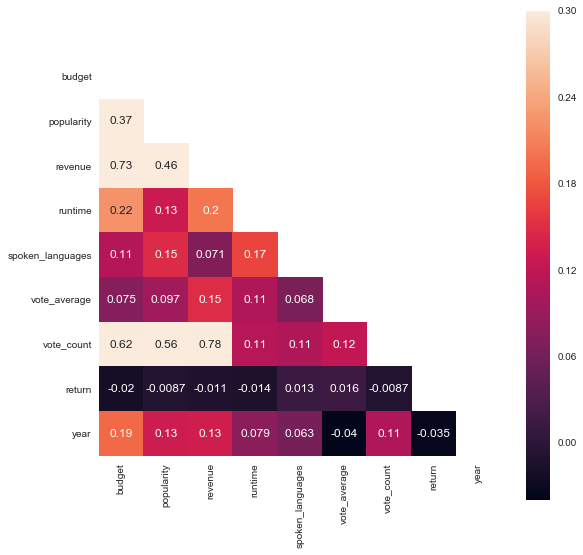

In [112]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [113]:
sns.set(font_scale=1.25)

### Genres

In [114]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] \
                                                                       if isinstance(x, list) else [])

In [115]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [116]:
s.head()

0    Animation
0       Comedy
0       Family
1    Adventure
1      Fantasy
Name: genre, dtype: object

In [117]:
gen_df = df.drop('genres', axis=1).join(s)

In [118]:
gen_df['genre'].value_counts().shape[0]

32

In [119]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


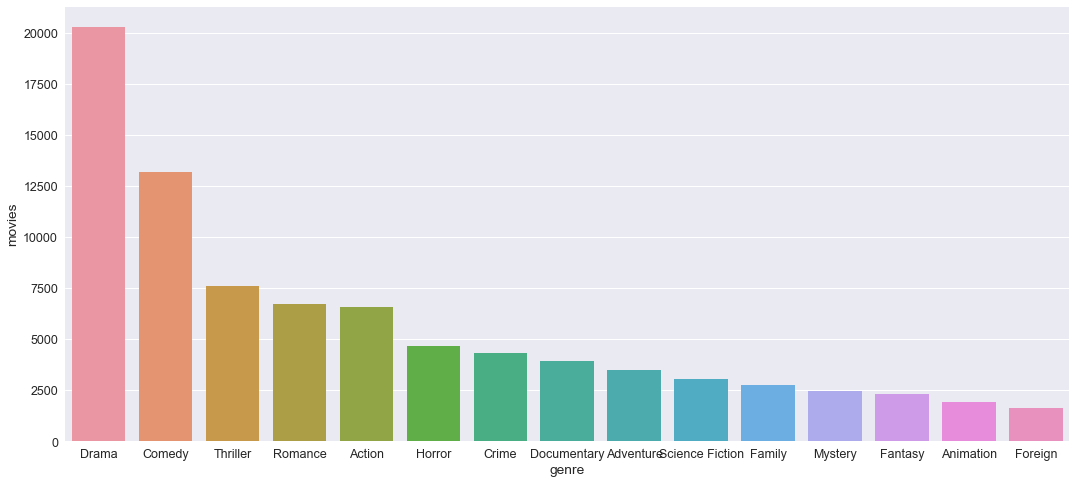

In [120]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

Is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased? Do certain years have a disproportionate share of Animation Movies? Let's find out!

In [121]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Documentary','Adventure', \
          'Science Fiction','Mystery', 'Fantasy', 'Family', 'Foreign','Animation']

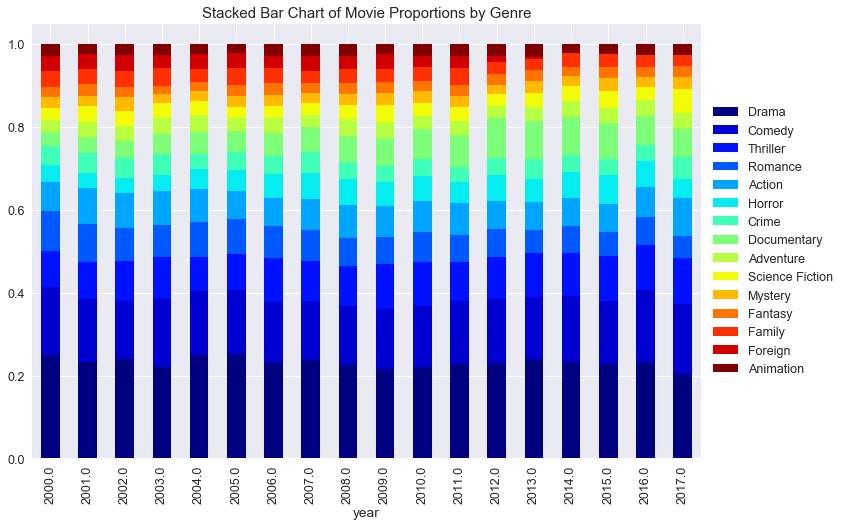

In [122]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', \
                                                                                   bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

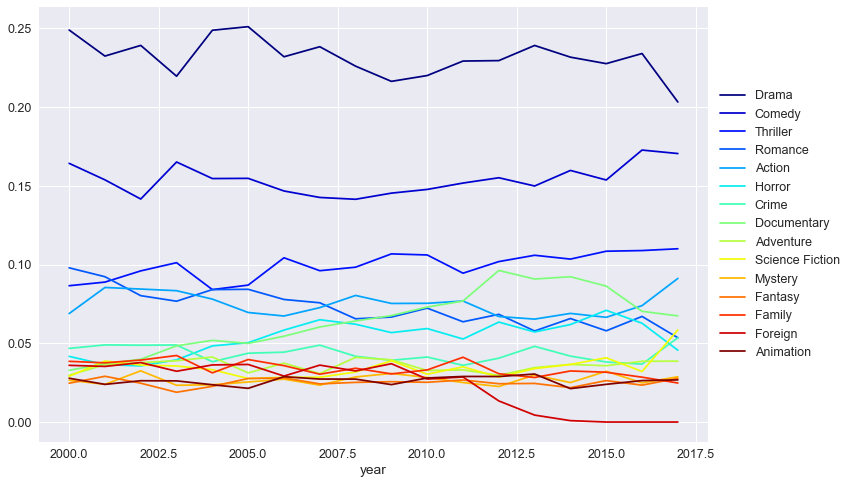

In [123]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', \
                                                                                     bbox_to_anchor=(1, 0.5))
plt.show()

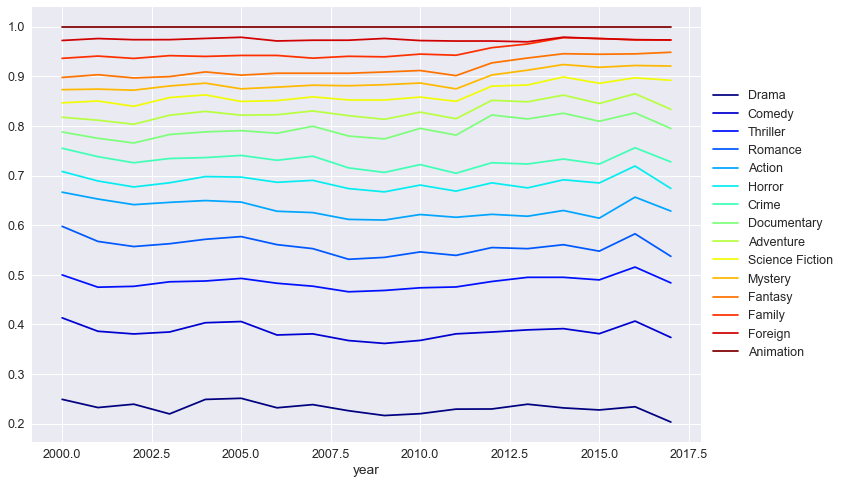

In [124]:
ctab[genres].plot(kind='line', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We should expect Science Fiction and Fantasy Movies to bring in more revenue than other genres but when normalized with their budget, do they prove to be as successful? We will visualize two violin plots to answer this question. One will be genres versus the revenue while the other will be versus returns.

In [125]:
vio_movies = gen_df[(gen_df['genre'].isin(genres))]

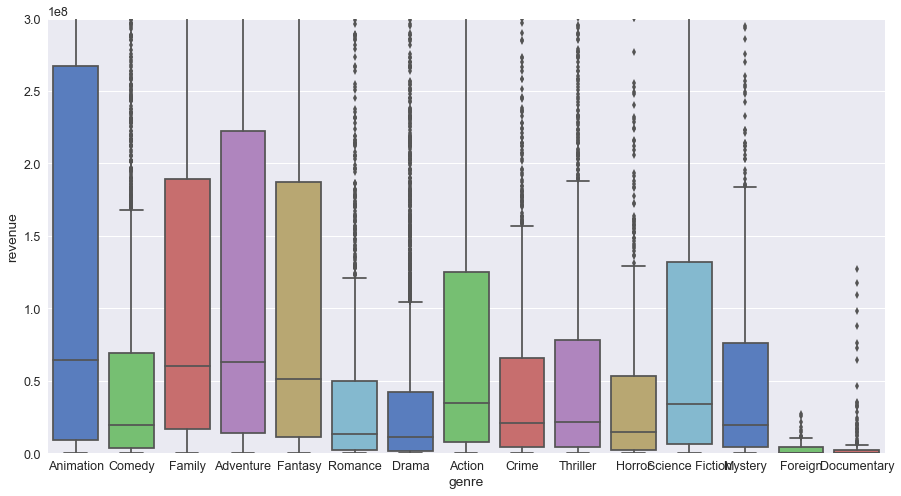

In [126]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=vio_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show();

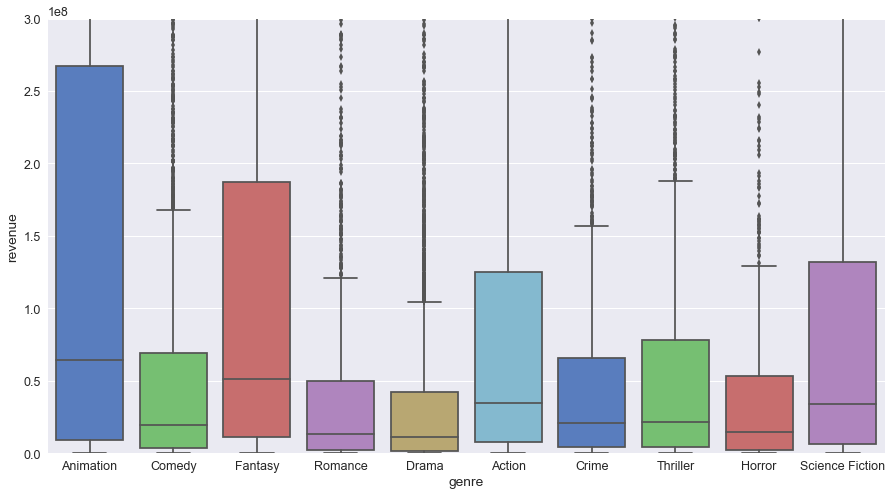

In [127]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy',\
                 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

Animation movies has the largest 25-75 range as well as the median revenue among all the genres plotted. Fantasy and Science Fiction have the second and third highest median revenue respectively.

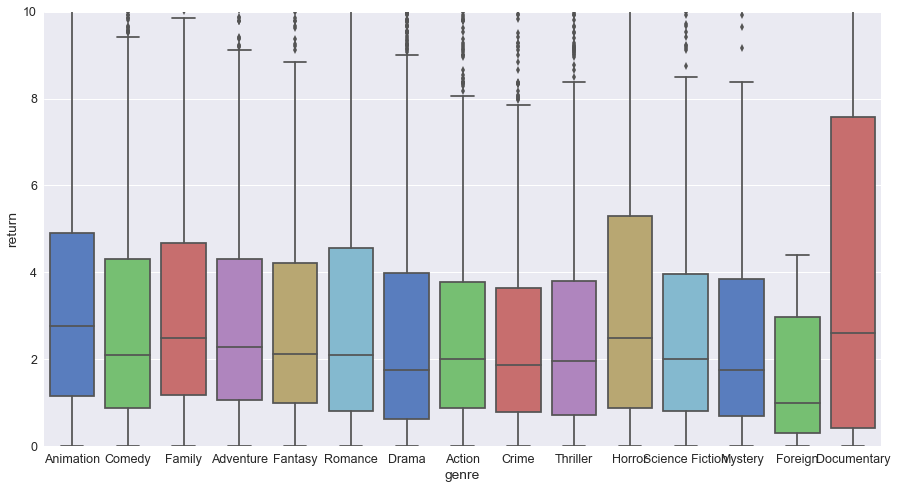

In [128]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=vio_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

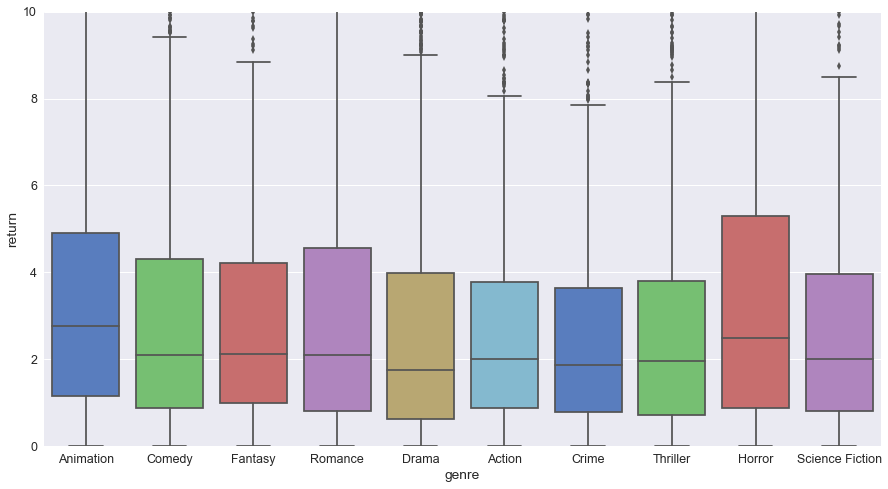

In [129]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

Documentaries showing higher return is due to them having smaller budget. Than comes the Horror movies with the same relation, and Animation movies seems to be 3rd runner.

### Cast and Crew

In [130]:
credits_df = pd.read_csv('./credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


* **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
* **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.
* **id:** The TMDB ID of movie.

In [131]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [132]:
df['id'] = df['id'].apply(convert_int)

In [133]:
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midni...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardo...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avala...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df = df.drop([19730, 29503, 35587])
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month


In [135]:
df['id'] = df['id'].astype('int')

In [136]:
# This is a left join on the df with credits_df
df = df.merge(credits_df, on='id')
df.shape

(45538, 27)

In [137]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [138]:
df['cast'].head()

0    [{u'name': u'Tom Hanks', u'gender': 2, u'chara...
1    [{u'name': u'Robin Williams', u'gender': 2, u'...
2    [{u'name': u'Walter Matthau', u'gender': 2, u'...
3    [{u'name': u'Whitney Houston', u'gender': 1, u...
4    [{u'name': u'Steve Martin', u'gender': 2, u'ch...
Name: cast, dtype: object

In [139]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [140]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['cast'].head()

0    [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2    [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3    [Whitney Houston, Angela Bassett, Loretta Devi...
4    [Steve Martin, Diane Keaton, Martin Short, Kim...
Name: cast, dtype: object

In [141]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [142]:
df['director'] = df['crew'].apply(get_director)
df['director'].head()

0      John Lasseter
1       Joe Johnston
2      Howard Deutch
3    Forest Whitaker
4      Charles Shyer
Name: director, dtype: object

In [143]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

### Actors with the Highest Total Revenue

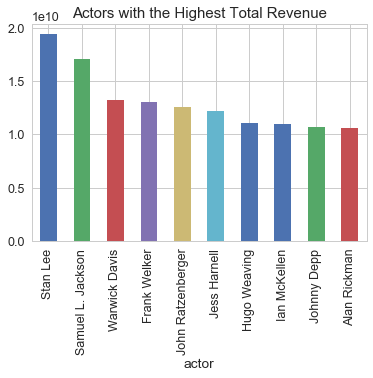

In [144]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Directors with the Highest Total Revenue

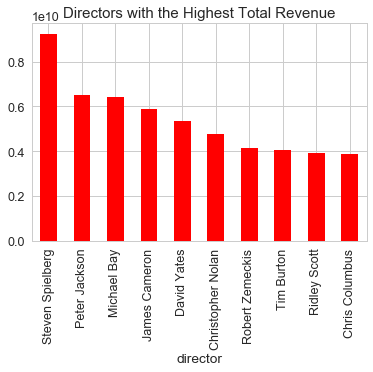

In [145]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show();

In [146]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

### Actors with Highest Average Revenue

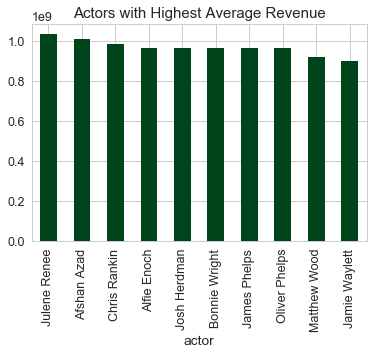

In [147]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).\
plot(kind='bar', colormap='Greens_r')
plt.show();

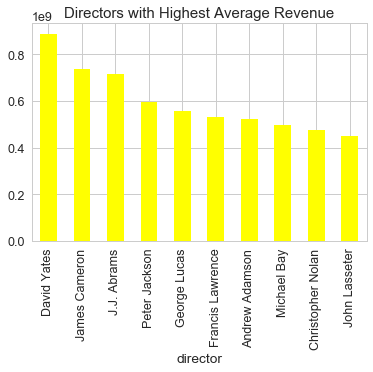

In [148]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

### Most Successful Actors and Directors

In [149]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


In [150]:
dir_success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(dir_success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


John G. Avildsen has an unnaturally high return. This is suspicious. We should check what is going on.

In [151]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


Karete Kid II certainly did not cost only 113 USD. But it costed 13 million dollars. 
Let's try to fix this. 

In [152]:
# df[df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]['title']=='The Karate Kid, Part II']['budget']==13000000.0

## Regression: Predicting Movie Revenues

In [153]:
rgf = df[df['return'].notnull()]
rgf.shape

(5393, 30)

In [154]:
rgf.columns

Index([u'belongs_to_collection', u'budget', u'genres', u'homepage', u'id',
       u'original_language', u'overview', u'popularity', u'poster_path',
       u'production_companies', u'production_countries', u'release_date',
       u'revenue', u'runtime', u'spoken_languages', u'status', u'tagline',
       u'title', u'video', u'vote_average', u'vote_count', u'return', u'year',
       u'day', u'month', u'cast', u'crew', u'cast_size', u'crew_size',
       u'director'],
      dtype='object')

In [155]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return', \
                'crew'], axis=1)

We will perform the following feature engineering tasks:

* **belongs_to_collection** will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.
* **genres** will be converted into number of genres.
* **homepage** will be converted into a Boolean variable that will indicate if a movie has a homepage or not.
* **original_language** will be replaced by a feature called is_foreign to denote if a particular film is in English or a Foreign Language.
* **production_companies** will be replaced with just the number of production companies collaborating to make the movie.
* **production_countries** will be replaced with the number of countries the film was shot in.
* **day** will be converted into a binary feature to indicate if the film was released on a Friday.
* **month** will be converted into a variable that indicates if the month was a holiday season.

In [156]:
s = rgf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres', axis=1).join(s)
gen_rgf.head()

,belongs_to_collection,budget,homepage,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,...,vote_average,vote_count,year,day,month,cast,cast_size,crew_size,director,genre
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,1,...,7.7,5415.0,1995.0,Mon,Oct,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",13,106,John Lasseter,Animation
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,1,...,7.7,5415.0,1995.0,Mon,Oct,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",13,106,John Lasseter,Comedy
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,1,...,7.7,5415.0,1995.0,Mon,Oct,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",13,106,John Lasseter,Family
1,NaN,65000000.0,NaN,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,2,...,6.9,2413.0,1995.0,Fri,Dec,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",26,16,Joe Johnston,Adventure
1,NaN,65000000.0,NaN,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,2,...,6.9,2413.0,1995.0,Fri,Dec,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",26,16,Joe Johnston,Fantasy


In [157]:
gen_rgf['genre']

0              Animation
0                 Comedy
0                 Family
1              Adventure
1                Fantasy
1                 Family
3                 Comedy
3                  Drama
3                Romance
5                 Action
5                  Crime
5                  Drama
5               Thriller
8                 Action
8              Adventure
8               Thriller
9              Adventure
9                 Action
9               Thriller
10                Comedy
10                 Drama
10               Romance
13               History
13                 Drama
14                Action
14             Adventure
15                 Drama
15                 Crime
16                 Drama
16               Romance
              ...       
44923             Comedy
44929             Comedy
44929            Romance
45043             Comedy
45043            Romance
45087             Action
45087            Western
45087    Science Fiction
45087            Fantasy


In [158]:
genres_train = gen_rgf['genre'].drop_duplicates()

In [159]:
genres_train.value_counts()

History            1
Thriller           1
Romance            1
Western            1
Family             1
Mystery            1
Horror             1
Crime              1
Drama              1
Fantasy            1
Foreign            1
Animation          1
Music              1
Adventure          1
Action             1
TV Movie           1
Comedy             1
Documentary        1
War                1
Science Fiction    1
Name: genre, dtype: int64

In [160]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title', 'cast', 'director'], axis=1)
    df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [161]:
X, y = rgf.drop('revenue', axis=1), rgf['revenue']

In [162]:
X = feature_engineering(X)

In [163]:
X.head()

,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,runtime,spoken_languages,vote_average,...,is_War,is_Foreign,is_Documentary,is_Western,is_Music,is_nan,is_TV Movie,is_english,is_Friday,is_Holiday
0,1,30000000.0,3,1,21.946943,1,1,81.0,1,7.7,...,0,0,0,0,0,0,0,1,0,0
1,1,65000000.0,3,1,17.015539,3,1,104.0,2,6.9,...,0,0,0,0,0,0,0,1,1,0
3,1,16000000.0,3,1,3.859495,1,1,127.0,1,6.1,...,0,0,0,0,0,0,0,1,1,0
5,1,60000000.0,4,1,17.924927,3,1,170.0,2,7.7,...,0,0,0,0,0,0,0,1,1,0
8,1,35000000.0,3,1,5.231580,3,1,106.0,1,5.5,...,0,0,0,0,0,0,0,1,1,0


In [164]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [165]:
X.shape

(5393, 38)

In [166]:
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.7676893672179284

In [167]:
dummy = DummyRegressor()
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)

-0.00039143562441879

In [168]:
reg.feature_importances_

array([0.        , 0.14766953, 0.01175145, 0.        , 0.09975682,
       0.01828438, 0.01045406, 0.05556157, 0.00473644, 0.06273477,
       0.3275485 , 0.0512224 , 0.03933555, 0.06443154, 0.0156783 ,
       0.00481974, 0.0174132 , 0.00181836, 0.00188762, 0.00330214,
       0.01078835, 0.        , 0.0047558 , 0.00369025, 0.        ,
       0.02023681, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00714494, 0.0032205 , 0.        , 0.        ,
       0.00037732, 0.00283309, 0.00854657])

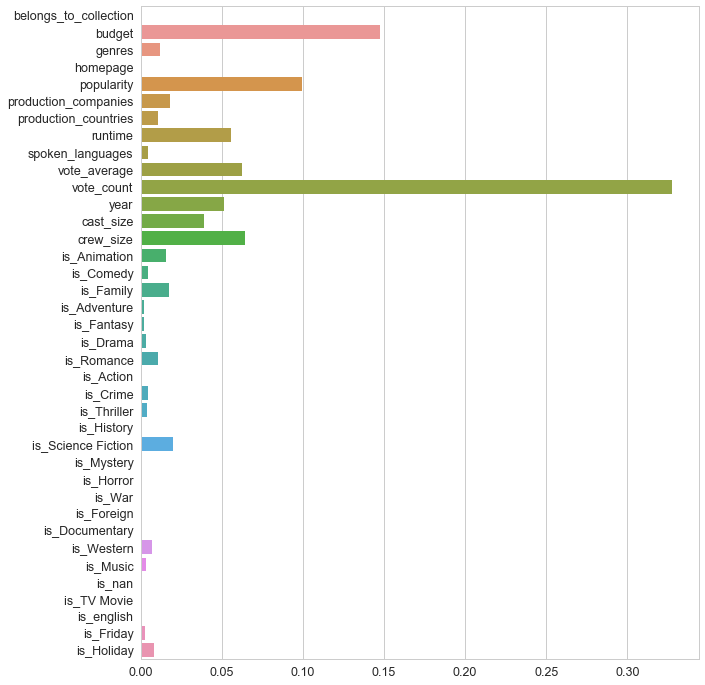

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns);

## Classification: Predicting Movie Sucess

In [170]:
cls = df[df['return'].notnull()]
cls.shape

(5393, 30)

In [171]:
cls.columns

Index([u'belongs_to_collection', u'budget', u'genres', u'homepage', u'id',
       u'original_language', u'overview', u'popularity', u'poster_path',
       u'production_companies', u'production_countries', u'release_date',
       u'revenue', u'runtime', u'spoken_languages', u'status', u'tagline',
       u'title', u'video', u'vote_average', u'vote_count', u'return', u'year',
       u'day', u'month', u'cast', u'crew', u'cast_size', u'crew_size',
       u'director'],
      dtype='object')

In [172]:
cls = cls.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'revenue'], axis=1)

In [173]:
cls['return'] = cls['return'].apply(lambda x: 1 if x >=1 else 0)

In [174]:
cls['return'].value_counts()

1    3784
0    1609
Name: return, dtype: int64

Our classes seem to be fairly balanced. We do not need to apply any additional methods to deal with the imbalance of classes. Let us now turn our attention to our features.



In [175]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)

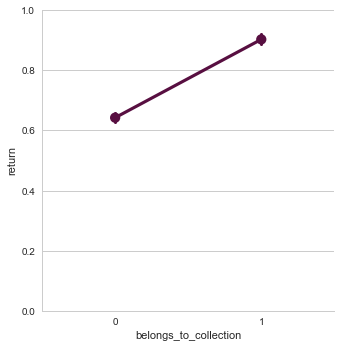

In [176]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=cls, x_vars=['belongs_to_collection'], y_vars='return', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

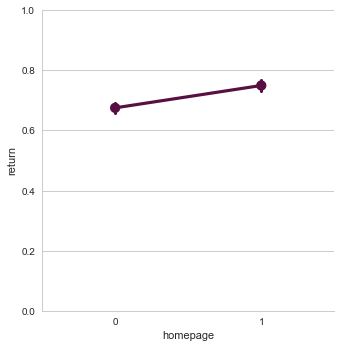

In [177]:
cls['homepage'] = cls['homepage'].fillna('').apply(lambda x: 0 if x == '' else 1)
g = sns.PairGrid(data=cls, x_vars=['homepage'], y_vars='return', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

We see that with homepages, there is not a very huge difference in probability. To avoid the curse of dimensionality, we will eliminate this feature as it is not very useful.

In [178]:
s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_cls = cls.drop('genres', axis=1).join(s)

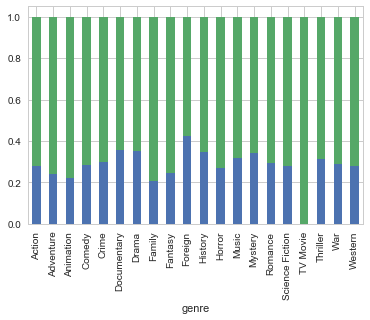

In [179]:
ctab = pd.crosstab([gen_cls['genre']], gen_cls['return'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', stacked=True, legend=False)

Since there isn't anything drastic about a particular genre, we will proceed with one hot encoding all genres.

In [180]:
cls.columns

Index([u'belongs_to_collection', u'budget', u'genres', u'homepage',
       u'original_language', u'popularity', u'production_companies',
       u'production_countries', u'runtime', u'spoken_languages', u'title',
       u'video', u'vote_average', u'vote_count', u'return', u'year', u'day',
       u'month', u'cast', u'crew', u'cast_size', u'crew_size', u'director'],
      dtype='object')

In [181]:
def classification_engineering(df):
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df = df.drop('homepage', axis=1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title', 'cast', 'director'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    df = df.drop('crew', axis=1)
    return df

In [182]:
cls = classification_engineering(cls)

In [183]:
cls.columns

Index([u'belongs_to_collection', u'budget', u'genres', u'popularity',
       u'production_companies', u'production_countries', u'runtime',
       u'spoken_languages', u'video', u'vote_average', u'vote_count',
       u'return', u'year', u'cast_size', u'crew_size', u'is_Animation',
       u'is_Comedy', u'is_Family', u'is_Adventure', u'is_Fantasy', u'is_Drama',
       u'is_Romance', u'is_Action', u'is_Crime', u'is_Thriller', u'is_History',
       u'is_Science Fiction', u'is_Mystery', u'is_Horror', u'is_War',
       u'is_Foreign', u'is_Documentary', u'is_Western', u'is_Music', u'is_nan',
       u'is_TV Movie', u'is_english', u'is_Friday', u'is_Holiday'],
      dtype='object')

In [184]:
X, y = cls.drop('return', axis=1), cls['return']

In [185]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [186]:
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.7790956263899185

In [187]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)

0.7020014825796886

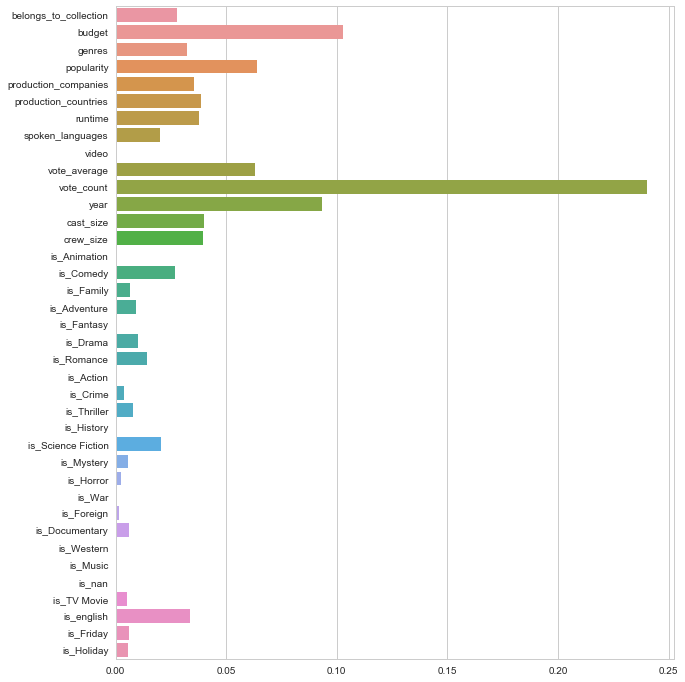

In [188]:
plt.figure(figsize=(10,12))
sns.barplot(x=clf.feature_importances_, y=X.columns)

# Recommenders System 

In [274]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

## Simple Recommender

This is not a personalized recommender. The implementation of this model is extremely trivial. All we have to do is sort our movies based on ratings and popularity and display the top movies of our list. As an added step, we can pass in a genre argument to get the top movies of a particular genre.

In [275]:
md = pd. read_csv('./movies_metadata.csv')
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [276]:
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x\
                                                                             ] if isinstance(x, list) else [])
md['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$
where,

* v is the number of votes for the movie
* m is the minimum votes required to be listed in the chart
* R is the average rating of the movie
* C is the mean vote across the whole report

We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list. I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [277]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [278]:
m = vote_counts.quantile(0.95)
m

434.0

In [279]:
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] \
                                                                       if x != np.nan else np.nan)

In [280]:
qualified = md[(md['vote_count'] >= m) & (md['vote_count'].notnull()) & (md['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

In [281]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [282]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [283]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

### Top Movies

In [284]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


In [285]:
s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = md.drop('genres', axis=1).join(s)

In [286]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

In [287]:
build_chart('Romance').head(15)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457,8.565285
351,Forrest Gump,1994,8147,8,48.3072,7.971357
876,Vertigo,1958,1162,8,18.2082,7.811667
40251,Your Name.,2016,1030,8,34.461252,7.789489
883,Some Like It Hot,1959,835,8,11.8451,7.745154
1132,Cinema Paradiso,1988,834,8,14.177,7.744878
19901,Paperman,2012,734,8,7.19863,7.713951
37863,Sing Street,2016,669,8,10.672862,7.689483
882,The Apartment,1960,498,8,11.9943,7.599317
38718,The Handmaiden,2016,453,8,16.727405,7.566166


## Content Base Recommender

To personalise our recommendations more, we are going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as Content Based Filtering.

Two Content Based Recommenders based on:
* Movie Overviews and Taglines
* Movie Cast, Crew, Keywords and Genre

Also, as mentioned in the introduction, we will be using a subset of all the movies available to us due to limiting computing power available.

In [288]:
links_small = pd.read_csv('./links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [289]:
md = md.drop([19730, 29503, 35587])

In [290]:
#Check EDA part of the Notebook for how and why I got these indices.
md['id'] = md['id'].astype('int')

In [291]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9099, 25)

### Movie Description Based Recommender

In [292]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [293]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [294]:
tfidf_matrix.shape

(9099, 268124)

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [295]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [296]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [297]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [298]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [299]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [300]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

### Metadata Based Recommender

In [301]:
credits = pd.read_csv('./credits.csv')
keywords = pd.read_csv('./keywords.csv')

In [302]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [303]:
md.shape

(45463, 25)

In [304]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [305]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 28)

We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:

* **Crew:** From the crew, we will only pick the director as our feature since the others don't contribute that much to the feel of the movie.
* **Cast:** Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list.

In [306]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [307]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [308]:
smd['director'] = smd['crew'].apply(get_director)

In [309]:
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [310]:
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

* **Strip Spaces and Convert to Lowercase** from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki.
* **Mention Director 3 times** to give it more weight relative to the entire cast.

In [311]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [312]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

In [313]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [314]:
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

In [315]:
s = s[s > 1]

In [328]:
from __future__ import unicode_literals, print_function

In [329]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

u'dog'

In [330]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [331]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 9: ordinal not in range(128)

In [319]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [320]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

UnicodeDecodeError: 'utf8' codec can't decode byte 0xa0 in position 46: invalid start byte

In [321]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

NameError: name 'count_matrix' is not defined

In [322]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [323]:
get_recommendations('The Dark Knight').head(10)

173                        Species
3379                   Exit Wounds
6842    Far from the Madding Crowd
12                           Balto
6427                Curious George
6568                 Blithe Spirit
3635                The Dream Team
9066        Long-Term Relationship
1611            The Black Cauldron
2167        The General's Daughter
Name: title, dtype: object

In [324]:
get_recommendations('Mean Girls').head(10)

8243           The Ambassador
6650            Blood Diamond
2841       Where the Money is
5400            La Dolce Vita
2955           Prizzi's Honor
4481      The American Friend
4781             House of Wax
5618              Dead Ringer
5683                 Undertow
4946    Dance with a Stranger
Name: title, dtype: object

In [325]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [326]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,year,wr
12,Balto,423,7,1995,6.111185
990,Ran,349,7,1985,6.027184
1256,Con Air,1289,6,1997,5.809800
310,"The Adventures of Priscilla, Queen of the Desert",174,7,1994,5.747179
7447,This Is It,253,6,2009,5.522977
1611,The Black Cauldron,228,6,1985,5.504962
2167,The General's Daughter,209,6,1999,5.490335
3288,Can't Buy Me Love,167,6,1987,5.454717
173,Species,457,5,1995,5.119287
8422,The Bling Ring,1205,5,2013,5.064848


## Collaborative Filtering


In [260]:
reader = Reader()

In [261]:
ratings = pd.read_csv('./ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [262]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [263]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8955
MAE:  0.6898
------------
Fold 2
RMSE: 0.9007
MAE:  0.6940
------------
Fold 3
RMSE: 0.8898
MAE:  0.6854
------------
Fold 4
RMSE: 0.9036
MAE:  0.6939
------------
Fold 5
RMSE: 0.8955
MAE:  0.6896
------------
------------
Mean RMSE: 0.8970
Mean MAE : 0.6905
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.6898279469672306,
                             0.6940355900088471,
                             0.6854072749333211,
                             0.6938734990521636,
                             0.6895781680256542],
                            'rmse': [0.895481286629104,
                             0.9007140141355043,
                             0.8897934300437305,
                             0.9035776756495347,
                             0.8954785472131389]})

In [264]:
trainset = data.build_full_trainset()
svd.train(trainset)

In [265]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [266]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.910441564350646, details={u'was_impossible': False})

## Hybrid Recommender

In [268]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [269]:
id_map = pd.read_csv('./links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [270]:
indices_map = id_map.set_index('id')

In [271]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [272]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,year,id,est
16462,True Grit,1701.0,7.2,2010,44264,3.267105
1180,"The Good, the Bad and the Ugly",2371.0,8.1,1966,429,3.193131
7016,Nausicaä of the Valley of the Wind,808.0,7.7,1984,81,3.076807
6367,Duel at Diablo,22.0,6.3,1966,1403,2.956634
3076,Brenda Starr,7.0,5.1,1989,47070,2.742917
5641,Continental Divide,28.0,5.5,1981,26560,2.726120
3457,Caddyshack,370.0,6.7,1980,11977,2.684169
4101,Double Impact,219.0,5.3,1991,9594,2.682485
6603,Fire,17.0,6.0,1996,513,2.680837
14589,The Box,610.0,5.4,2009,22825,2.670007


In [273]:
hybrid(500, 'Avatar')

,title,vote_count,vote_average,year,id,est
3529,Shanghai Noon,756.0,6.2,2000,8584,3.438540
4101,Double Impact,219.0,5.3,1991,9594,3.350982
15219,Steam of Life,11.0,6.9,2010,52903,3.231314
16462,True Grit,1701.0,7.2,2010,44264,3.196999
6015,Honkytonk Man,39.0,5.4,1982,37917,3.128355
14589,The Box,610.0,5.4,2009,22825,3.072267
9791,The Nomi Song,5.0,6.7,2004,41569,3.037874
1180,"The Good, the Bad and the Ugly",2371.0,8.1,1966,429,2.982803
6276,A Chorus Line,37.0,6.1,1985,1816,2.972439
3658,The Patriot,1130.0,6.8,2000,2024,2.939435
